<a href="https://colab.research.google.com/github/baeksumin/k-project/blob/main/data_preprocessing/TimeSeries_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
#from sympy import Derivative
import numpy as np
from pprint import pprint
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 저장된 삼성전자(KR7005930003) 데이터 가져오기

data_path = '/content/drive/MyDrive/[Shared]K-Project/data/'
with open(data_path + 'initial_data1.json',"r") as json_file:
    json_data = json.load(json_file) 

df = pd.read_json(json_data['KR7005930003'], orient ='index') 
samsung = df.transpose()
samsung

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2021/11/03,005930,삼성전자,"70,400","71,700","71,700","70,100","420,272,691,520,000","3,841",18.33,"39,406",1.79,"2,994",4.25
1,2021/11/02,005930,삼성전자,"71,500","70,800","72,200","70,700","426,839,452,325,000","3,841",18.61,"39,406",1.81,"2,994",4.19
2,2021/11/01,005930,삼성전자,"69,900","70,200","70,600","69,900","417,287,800,245,000","3,841",18.20,"39,406",1.77,"2,994",4.28
3,2021/10/29,005930,삼성전자,"69,800","71,200","71,600","69,700","416,690,821,990,000","3,841",18.17,"39,406",1.77,"2,994",4.29
4,2021/10/28,005930,삼성전자,"70,700","69,500","72,200","69,500","422,063,626,285,000","3,841",18.41,"39,406",1.79,"2,994",4.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,1995/05/08,005930,삼성전자,"121,000","122,000","122,000","120,500","6,578,606,045,000",-,-,-,-,-,-
6710,1995/05/06,005930,삼성전자,"122,000","122,000","123,500","122,000","6,632,974,690,000",-,-,-,-,-,-
6711,1995/05/04,005930,삼성전자,"122,500","124,000","124,500","122,000","6,660,159,012,500",-,-,-,-,-,-
6712,1995/05/03,005930,삼성전자,"123,500","119,500","126,500","119,500","6,714,527,657,500",-,-,-,-,-,-


In [ ]:
df = pd.read_json(json_data['KR7005930003'], orient ='index') 
samsung = df.transpose()
samsung

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2021/11/03,005930,삼성전자,"70,400","71,700","71,700","70,100","420,272,691,520,000","3,841",18.33,"39,406",1.79,"2,994",4.25
1,2021/11/02,005930,삼성전자,"71,500","70,800","72,200","70,700","426,839,452,325,000","3,841",18.61,"39,406",1.81,"2,994",4.19
2,2021/11/01,005930,삼성전자,"69,900","70,200","70,600","69,900","417,287,800,245,000","3,841",18.20,"39,406",1.77,"2,994",4.28
3,2021/10/29,005930,삼성전자,"69,800","71,200","71,600","69,700","416,690,821,990,000","3,841",18.17,"39,406",1.77,"2,994",4.29
4,2021/10/28,005930,삼성전자,"70,700","69,500","72,200","69,500","422,063,626,285,000","3,841",18.41,"39,406",1.79,"2,994",4.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,1995/05/08,005930,삼성전자,"121,000","122,000","122,000","120,500","6,578,606,045,000",-,-,-,-,-,-
6710,1995/05/06,005930,삼성전자,"122,000","122,000","123,500","122,000","6,632,974,690,000",-,-,-,-,-,-
6711,1995/05/04,005930,삼성전자,"122,500","124,000","124,500","122,000","6,660,159,012,500",-,-,-,-,-,-
6712,1995/05/03,005930,삼성전자,"123,500","119,500","126,500","119,500","6,714,527,657,500",-,-,-,-,-,-


In [ ]:
#시간순 재정렬.
samsung = samsung.sort_values(by=['TRD_DD'])
samsung.reset_index(drop=True,inplace=True)
samsung['TRD_DD']=pd.to_datetime(samsung['TRD_DD']) #datetime변환

#시가총액 str->float 데이터타입변환
samsung['MKTCAP'] = samsung['MKTCAP'].str.replace(',','').astype('float')


#7월부터 10월 20일까지만 추출
samsung01 = samsung[['TRD_DD','MKTCAP']]

samsung01= samsung01[(samsung01['TRD_DD']>='2021-01-01') & (samsung01['TRD_DD']<='2021-10-20')]
samsung01 = samsung01.rename(columns = {'TRD_DD':'x','MKTCAP':'y'})
samsung01.reset_index(drop=True,inplace=True)
samsung01

,x,y
0,2021-01-04,4.954920e+14
1,2021-01-05,5.008648e+14
2,2021-01-06,4.907161e+14
3,2021-01-07,4.948950e+14
4,2021-01-08,5.301167e+14
...,...,...
192,2021-10-14,4.143029e+14
193,2021-10-15,4.184818e+14
194,2021-10-18,4.190787e+14
195,2021-10-19,4.214666e+14


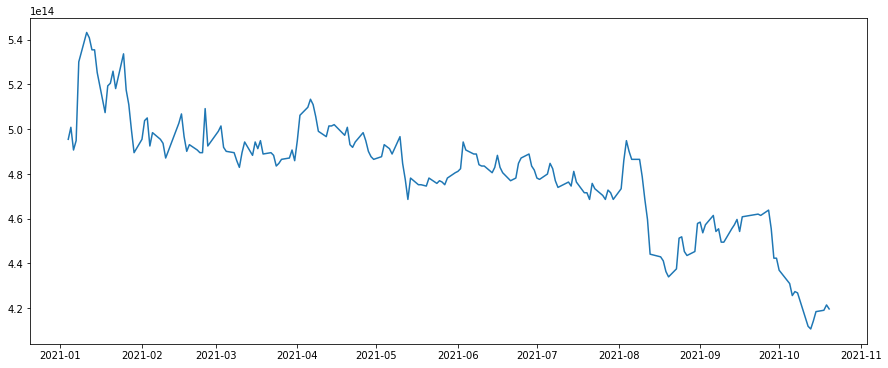

In [ ]:

plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])

In [ ]:
samsung01['ch'] = np.nan

for i in range(samsung01.shape[0]-1):
  y2 = samsung01.iloc[i+1,1]
  y1 = samsung01.iloc[i,1]

  if (y2-y1>=0):
    samsung01.iloc[i,2] = 1
  else:
    samsung01.iloc[i,2] = 0

In [ ]:
samsung01['ch_result'] = np.nan

for i in range(samsung01.shape[0]-1):
  

  check = samsung01.iloc[i,2] != samsung01.iloc[i+1,2]
  if(check):
    samsung01.iloc[i+1,3]= True
  else:
    samsung01.iloc[i+1,3]= False

In [ ]:
check = samsung01[samsung01['ch_result']==True]
check.reset_index(drop=True, inplace= True)


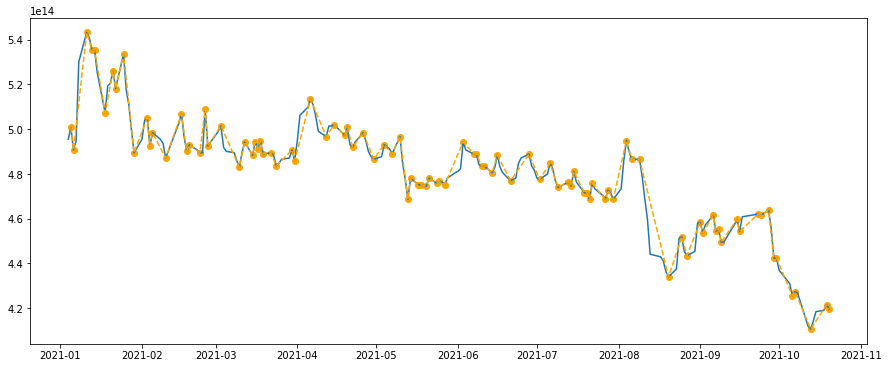

In [ ]:
x = list(check.x)
y = list(check.y)

plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])
plt.scatter(x,y, color = "orange")
plt.plot(x,y, color = "orange", linestyle = "--")
plt.show()

In [ ]:
df = check[['x']]
df= df.iloc[:-1]
df['x2'] = np.nan
df['y1'] = np.nan
df['y2'] = np.nan
df.rename(columns ={'x':'x1'}, inplace = True)
df['t'] = np.nan
df['p'] = 0.0

for i in range(df.shape[0]):
  
  df.iloc[i,1] = check.iloc[i+1,0]
  df.iloc[i,2] = check.iloc[i,1]
  df.iloc[i,3] = check.iloc[i+1,1]

for i in range(df.shape[0]):
  t = df.iloc[i,1] - df.iloc[i,0]
  df.iloc[i,4] = t.days

  y1 = df.iloc[i,2]
  y2 = df.iloc[i,3]
  result = (abs(y2 - y1 )) / ((y1+y2)/2 )
  df.iloc[i,5] = result
df

,x1,x2,y1,y2,t,p
0,2021-01-05,2021-01-06 00:00:00,5.008648e+14,4.907161e+14,1.0,0.020470
1,2021-01-06,2021-01-11 00:00:00,4.907161e+14,5.432502e+14,5.0,0.101617
2,2021-01-11,2021-01-13 00:00:00,5.432502e+14,5.354895e+14,2.0,0.014388
3,2021-01-13,2021-01-14 00:00:00,5.354895e+14,5.354895e+14,1.0,0.000000
4,2021-01-14,2021-01-18 00:00:00,5.354895e+14,5.074315e+14,4.0,0.053807
...,...,...,...,...,...,...
92,2021-09-30,2021-10-06 00:00:00,4.423609e+14,4.256455e+14,6.0,0.038514
93,2021-10-06,2021-10-07 00:00:00,4.256455e+14,4.274364e+14,1.0,0.004199
94,2021-10-07,2021-10-13 00:00:00,4.274364e+14,4.107210e+14,6.0,0.039886
95,2021-10-13,2021-10-19 00:00:00,4.107210e+14,4.214666e+14,6.0,0.025825


In [ ]:
#t = 5 p = 0.05로 조건 변경
t = df['t'] <5
p = df['p']<0.05

result = df[~t&~p]
result

,x1,x2,y1,y2,t,p
1,2021-01-06,2021-01-11 00:00:00,4.907161e+14,5.432502e+14,5.0,0.101617
31,2021-03-31,2021-04-06 00:00:00,4.859403e+14,5.134013e+14,6.0,0.054958
73,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523
76,2021-08-09,2021-08-20 00:00:00,4.865373e+14,4.340032e+14,11.0,0.114137


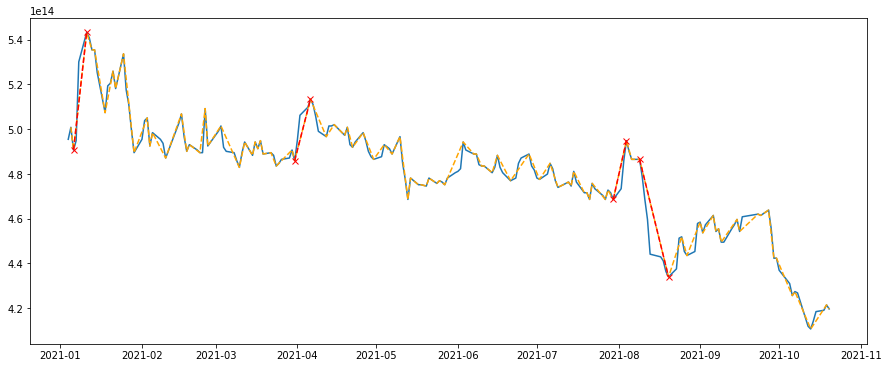

In [ ]:
x1 = list(df.iloc[0,:2])
y1 = list(df.iloc[0,2:4])

plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])
plt.plot(x,y, color = "orange", linestyle = "--")
#plt.scatter(x,y)
for i in range(result.shape[0]):
  x1 = list(result.iloc[i,:2])
  y1 = list(result.iloc[i,2:4])
  plt.plot(x1,y1, "rx--")
plt.show()

In [ ]:
#빨간 점 X 뽑아내기

red_x = list(result['x1'])+ list(result['x2'])
red_x = list(set(red_x))
red_x.sort()
red_x

[Timestamp('2021-01-06 00:00:00'),
 Timestamp('2021-01-11 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-06 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-08-04 00:00:00'),
 Timestamp('2021-08-09 00:00:00'),
 Timestamp('2021-08-20 00:00:00')]

In [ ]:
red = samsung01[samsung01.x == red_x[0]]

for i in red_x:
  df = samsung01[samsung01.x == i]
  red = red.append(df,ignore_index = True )

red = red.iloc[1:,:]

df1 = red[['x']]
df1= df1.iloc[:-1]
df1['x2'] = np.nan
df1['y1'] = np.nan
df1['y2'] = np.nan
df1.rename(columns ={'x':'x1'}, inplace = True)
df1['t'] = np.nan
df1['p'] = 0.0

for i in range(df1.shape[0]):
  
  df1.iloc[i,1] = red.iloc[i+1,0]
  df1.iloc[i,2] = red.iloc[i,1]
  df1.iloc[i,3] = red.iloc[i+1,1]

for i in range(df1.shape[0]):
  t = df1.iloc[i,1] - df1.iloc[i,0]
  df1.iloc[i,4] = t.days

  y1 = df1.iloc[i,2]
  y2 = df1.iloc[i,3]
  result = (abs(y2 - y1 )) / ((y1+y2)/2 )
  df1.iloc[i,5] = result

df1

,x1,x2,y1,y2,t,p
1,2021-01-06,2021-01-11 00:00:00,4.907161e+14,5.432502e+14,5.0,0.101617
2,2021-01-11,2021-03-31 00:00:00,5.432502e+14,4.859403e+14,79.0,0.111369
3,2021-03-31,2021-04-06 00:00:00,4.859403e+14,5.134013e+14,6.0,0.054958
4,2021-04-06,2021-07-30 00:00:00,5.134013e+14,4.686279e+14,115.0,0.091185
5,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523
6,2021-08-04,2021-08-09 00:00:00,4.948950e+14,4.865373e+14,5.0,0.017032
7,2021-08-09,2021-08-20 00:00:00,4.865373e+14,4.340032e+14,11.0,0.114137


In [ ]:
t =df1['t'] <5
p = df1['p']<0.05


result1 = df1[~t&~p]
result1


,x1,x2,y1,y2,t,p
1,2021-01-06,2021-01-11 00:00:00,4.907161e+14,5.432502e+14,5.0,0.101617
2,2021-01-11,2021-03-31 00:00:00,5.432502e+14,4.859403e+14,79.0,0.111369
3,2021-03-31,2021-04-06 00:00:00,4.859403e+14,5.134013e+14,6.0,0.054958
4,2021-04-06,2021-07-30 00:00:00,5.134013e+14,4.686279e+14,115.0,0.091185
5,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523
7,2021-08-09,2021-08-20 00:00:00,4.865373e+14,4.340032e+14,11.0,0.114137


In [ ]:
#기울기(m) 열 추가
result1['m'] = np.nan
for i in range(result1.shape[0]):
  m = result1.iloc[i,3]- result1.iloc[i,2] 
  
  if (m>0):
    result1.iloc[i,6] = 1
  elif (m<0):
    result1.iloc[i,6] = -1
  else :
    result1.iloc[i,6] = 0
result1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,x1,x2,y1,y2,t,p,m
1,2021-01-06,2021-01-11 00:00:00,4.907161e+14,5.432502e+14,5.0,0.101617,1.0
2,2021-01-11,2021-03-31 00:00:00,5.432502e+14,4.859403e+14,79.0,0.111369,-1.0
3,2021-03-31,2021-04-06 00:00:00,4.859403e+14,5.134013e+14,6.0,0.054958,1.0
4,2021-04-06,2021-07-30 00:00:00,5.134013e+14,4.686279e+14,115.0,0.091185,-1.0
5,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523,1.0
7,2021-08-09,2021-08-20 00:00:00,4.865373e+14,4.340032e+14,11.0,0.114137,-1.0


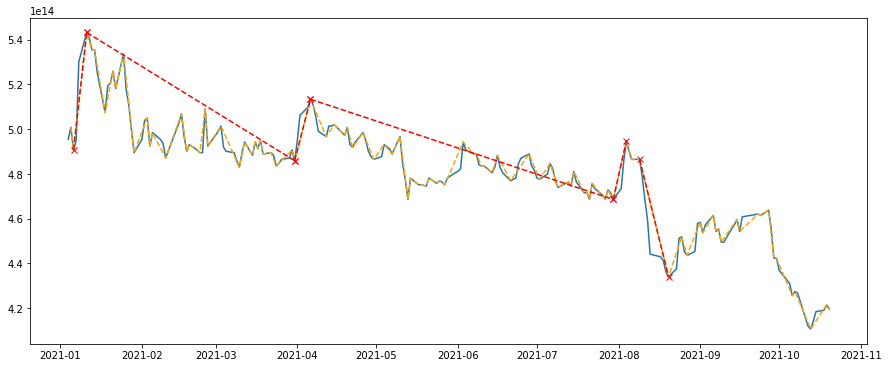

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])
plt.plot(x,y, color = "orange", linestyle = "--")
#plt.scatter(x,y)
for i in range(result1.shape[0]):
  x1 = list(result1.iloc[i,:2])
  y1 = list(result1.iloc[i,2:4])
  plt.plot(x1,y1, "rx--")
plt.show()

In [ ]:
#빨간 점 X 뽑아내기

red_x1 = list(result1['x1'])+ list(result1['x2'])
red_x1 = list(set(red_x1))
red_x1.sort()
red_x1

[Timestamp('2021-01-06 00:00:00'),
 Timestamp('2021-01-11 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-06 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-08-04 00:00:00'),
 Timestamp('2021-08-09 00:00:00'),
 Timestamp('2021-08-20 00:00:00')]

In [ ]:
red_x == red_x1 #이전과 동일

True

In [ ]:
for i in range(result1.shape[0]-1):

  #i번째 기울기 음수일때
  if (result1.iloc[i,6]== -1):  
    #i+1번째 기울기 양수일 때
    if (result1.iloc[i+1,6] == 1): 
      if (result1.iloc[i,1] != result1.iloc[i+1,0]):
        if( result1.iloc[i,3]== result1.iloc[i+1,2] )  :
          red_x1.remove(result1.iloc[i,1])
    #i+1번째 기울기 음수일 때
    elif (result1.iloc [i+1,6]== -1):       
      red_x1.remove(result1.iloc[i,1])

  #i번째 기울기 양수일때
  else :   
    #i+1번째 기울기 양수일 때
    if (result1.iloc[i+1,6] == 1): 
      red_x1.remove(result1.iloc[i,1])  
     

red_x1

[Timestamp('2021-01-06 00:00:00'),
 Timestamp('2021-01-11 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-06 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-08-04 00:00:00'),
 Timestamp('2021-08-09 00:00:00'),
 Timestamp('2021-08-20 00:00:00')]

In [ ]:
final = samsung01[samsung01.x == red_x1[0]]

for i in red_x1:
  df = samsung01[samsung01.x == i]
  final = final.append(df,ignore_index = True )

final = final.iloc[1:,:]

df2 = final[['x']]
df2= df2.iloc[:-1]
df2['x2'] = np.nan
df2['y1'] = np.nan
df2['y2'] = np.nan
df2.rename(columns ={'x':'x1'}, inplace = True)
df2['t'] = np.nan
df2['p'] = 0.0

for i in range(df2.shape[0]):
  
  df2.iloc[i,1] = final.iloc[i+1,0]
  df2.iloc[i,2] = final.iloc[i,1]
  df2.iloc[i,3] = final.iloc[i+1,1]

for i in range(df2.shape[0]):
  t = df2.iloc[i,1] - df2.iloc[i,0]
  df2.iloc[i,4] = t.days

  y1 = df2.iloc[i,2]
  y2 = df2.iloc[i,3]
  res = (abs(y2 - y1 )) / ((y1+y2)/2 )
  df2.iloc[i,5] = res

t =df2['t'] <5
p = df2['p']<0.02


result2 = df2[~t&~p]

result2['m'] = np.nan
for i in range(result2.shape[0]):
  m = result2.iloc[i,3]- result2.iloc[i,2]

  
  
  if (m>0):
    result2.iloc[i,6] = 1
  elif (m<0):
    result2.iloc[i,6] = -1
  else :
    result2.iloc[i,6] = 0
result2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,x1,x2,y1,y2,t,p,m
1,2021-01-06,2021-01-11 00:00:00,4.907161e+14,5.432502e+14,5.0,0.101617,1.0
2,2021-01-11,2021-03-31 00:00:00,5.432502e+14,4.859403e+14,79.0,0.111369,-1.0
3,2021-03-31,2021-04-06 00:00:00,4.859403e+14,5.134013e+14,6.0,0.054958,1.0
4,2021-04-06,2021-07-30 00:00:00,5.134013e+14,4.686279e+14,115.0,0.091185,-1.0
5,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523,1.0
7,2021-08-09,2021-08-20 00:00:00,4.865373e+14,4.340032e+14,11.0,0.114137,-1.0


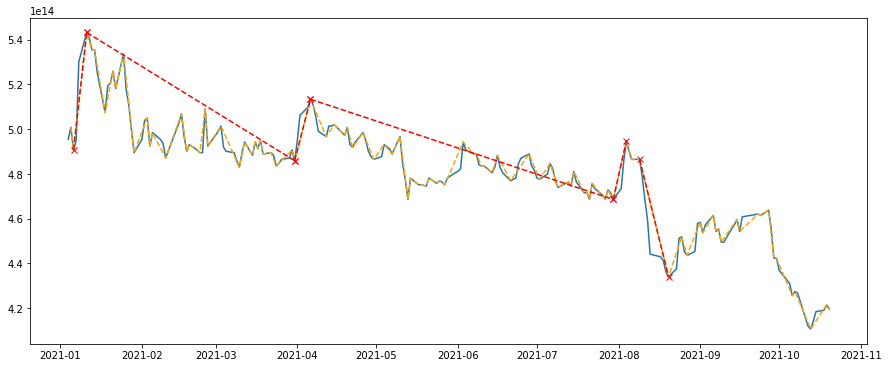

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])
plt.plot(x,y, color = "orange", linestyle = "--")
#plt.scatter(x,y)
for i in range(result2.shape[0]):
  x1 = list(result2.iloc[i,:2])
  y1 = list(result2.iloc[i,2:4])
  plt.plot(x1,y1, "rx--")
plt.show()

In [ ]:
#빨간 점 X 뽑아내기

red_x1 = list(result2['x1'])+ list(result2['x2'])
red_x1 = list(set(red_x1))
red_x1.sort()
red_x1

[Timestamp('2021-01-06 00:00:00'),
 Timestamp('2021-01-11 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-06 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-08-04 00:00:00'),
 Timestamp('2021-08-09 00:00:00'),
 Timestamp('2021-08-20 00:00:00')]

In [ ]:
for i in range(result2.shape[0]-1):

  #i번째 기울기 음수일때
  if (result2.iloc[i,6]== -1):  
    #i+1번째 기울기 양수일 때
    if (result2.iloc[i+1,6] == 1): 
      #점이 이어져 있지 않으면
      if (result2.iloc[i,1] != result2.iloc[i+1,0]):
        if(result2.iloc[i,3]== result2.iloc[i+2,2]):
           red_x1.remove(result2.iloc[i,1])
           


    #i+1번째 기울기 음수일 때
    elif (result2.iloc [i+1,6]== -1):       
      red_x1.remove(result2.iloc[i,1])


  #i번째 기울기 양수일때
  else :   
    #i+1번째 기울기 양수일 때
    if (result2.iloc[i+1,6] == 1): 
      #점이 이어져 있지 않으면
      if (result2.iloc[i,1] != result2.iloc[i+1,0]):
        red_x1.remove(result2.iloc[i,1])
        red_x1.remove(result2.iloc[i+1,0]) 
      #점이 이어져 있으면
      else :
        red_x1.remove(result2.iloc[i,1])

    else :
      if (result2.iloc[i,1] != result2.iloc[i+1,0]):
        red_x1.remove(result2.iloc[i+1,0])
     

red_x1

[Timestamp('2021-01-06 00:00:00'),
 Timestamp('2021-01-11 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-06 00:00:00'),
 Timestamp('2021-07-30 00:00:00'),
 Timestamp('2021-08-04 00:00:00'),
 Timestamp('2021-08-20 00:00:00')]

In [ ]:
final = samsung01[samsung01.x == red_x1[0]]

for i in red_x1:
  df = samsung01[samsung01.x == i]
  final = final.append(df,ignore_index = True )

final = final.iloc[1:,:]

df2 = final[['x']]
df2= df2.iloc[:-1]
df2['x2'] = np.nan
df2['y1'] = np.nan
df2['y2'] = np.nan
df2.rename(columns ={'x':'x1'}, inplace = True)
df2['t'] = np.nan
df2['p'] = 0.0

for i in range(df2.shape[0]):
  
  df2.iloc[i,1] = final.iloc[i+1,0]
  df2.iloc[i,2] = final.iloc[i,1]
  df2.iloc[i,3] = final.iloc[i+1,1]

for i in range(df2.shape[0]):
  t = df2.iloc[i,1] - df2.iloc[i,0]
  df2.iloc[i,4] = t.days

  y1 = df2.iloc[i,2]
  y2 = df2.iloc[i,3]
  res = (abs(y2 - y1 )) / ((y1+y2)/2 )
  df2.iloc[i,5] = res

t =df2['t'] <5
p = df2['p']<0.05


result2 = df2[~t&~p]

result2['m'] = np.nan
for i in range(result2.shape[0]):
  m = result2.iloc[i,3]- result2.iloc[i,2]

  
  
  if (m>0):
    result2.iloc[i,6] = 1
  elif (m<0):
    result2.iloc[i,6] = -1
  else :
    result2.iloc[i,6] = 0
result2



,x1,x2,y1,y2,t,p,m
1,2021-01-06,2021-01-11 00:00:00,4.907161e+14,5.432502e+14,5.0,0.101617,1.0
2,2021-01-11,2021-03-31 00:00:00,5.432502e+14,4.859403e+14,79.0,0.111369,-1.0
3,2021-03-31,2021-04-06 00:00:00,4.859403e+14,5.134013e+14,6.0,0.054958,1.0
4,2021-04-06,2021-07-30 00:00:00,5.134013e+14,4.686279e+14,115.0,0.091185,-1.0
5,2021-07-30,2021-08-04 00:00:00,4.686279e+14,4.948950e+14,5.0,0.054523,1.0
6,2021-08-04,2021-08-20 00:00:00,4.948950e+14,4.340032e+14,16.0,0.131105,-1.0


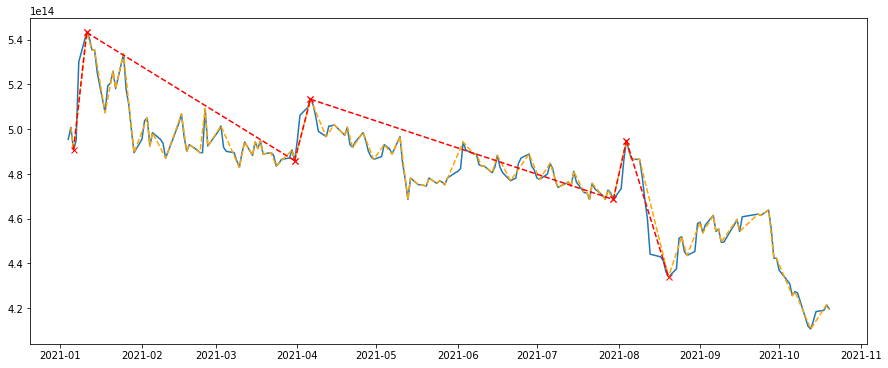

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(samsung01['x'],samsung01['y'])
plt.plot(x,y, color = "orange", linestyle = "--")
#plt.scatter(x,y)
for i in range(result2.shape[0]):
  x1 = list(result2.iloc[i,:2])
  y1 = list(result2.iloc[i,2:4])
  plt.plot(x1,y1, "rx--")
plt.show()

In [ ]:
final = samsung01[samsung01.x == red_x1[0]]

for i in red_x1:
  df = samsung01[samsung01.x == i]
  final = final.append(df,ignore_index = True )

final = final.iloc[1:,:2]
final

,x,y
1,2021-01-06,4.907161e+14
2,2021-01-11,5.432502e+14
3,2021-03-31,4.859403e+14
4,2021-04-06,5.134013e+14
5,2021-07-30,4.686279e+14
6,2021-08-04,4.948950e+14
7,2021-08-20,4.340032e+14


In [ ]:
for i in range(final.shape[0]-1):
  if(result2.iloc[i,6]== 1):
    final.iloc[i,1] = -1
  else :
    final.iloc[i,1] = 1

#final =final[1:final.shape[0]-1]
n = final.shape[0]-2
if(final.iloc[n,1]== -1):
  final.iloc[final.shape[0]-1,1] = 1
else:
  final.iloc[final.shape[0]-1,1] = -1

final

,x,y
1,2021-01-06,-1.0
2,2021-01-11,1.0
3,2021-03-31,-1.0
4,2021-04-06,1.0
5,2021-07-30,-1.0
6,2021-08-04,1.0
7,2021-08-20,-1.0


(737791.0, 738083.0)

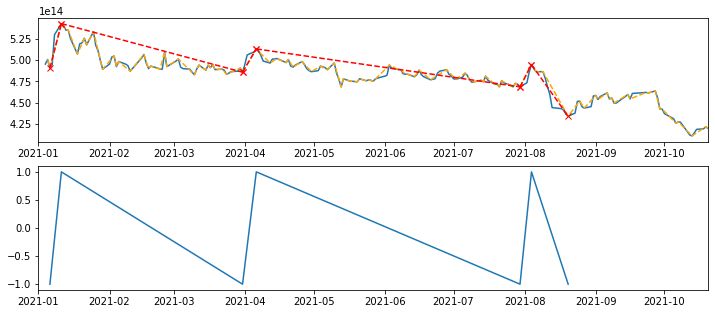

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


ax1.plot(samsung01['x'],samsung01['y'])
ax1.set_xlim([datetime.date(2021, 1, 1), datetime.date(2021, 10, 20)])
ax1.plot(x,y, color = "orange", linestyle = "--")

for i in range(result2.shape[0]):
  x1 = list(result2.iloc[i,:2])
  y1 = list(result2.iloc[i,2:4])
  ax1.plot(x1,y1, "rx--")


ax2.plot(final['x'],final['y'])
ax2.set_xlim([datetime.date(2021, 1, 1), datetime.date(2021, 10, 20)])